# James Mastran

**1. Poverty and Teen Pregnancy.**

**a) Download this dataset and read it into python.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt


f = open("poverty.txt", "r")
location = []
povPct = []
brth15to17 = []
brth18to19 = []
violCrime = []
teenBrth = []
print(f.readline()) #Get rid of headers
l = f.readline() #read first line into varaible 'l'
#Now let's read into these:
while l:
    l = l.split('\t')
    location.append(l[0])
    povPct.append(float(l[1]))
    brth15to17.append(float(l[2]))
    brth18to19.append(float(l[3]))
    violCrime.append(float(l[4]))
    teenBrth.append(float(l[5]))
    l = f.readline()
    

location = np.array(location)
povPct = np.array(povPct)
brth15to17 = np.array(brth15to17)
brth18to19 = np.array(brth18to19)
violCrime = np.array(violCrime)
teenBrth = np.array(teenBrth)


print('Now we have read in each line to a bunch of 1D arrays!!!')

Location	PovPct	Brth15to17	Brth18to19	ViolCrime	TeenBrth

Now we have read in each line to a bunch of 1D arrays!!!


**b)  Plot the teen birth data as a function of poverty using points, not curves.**

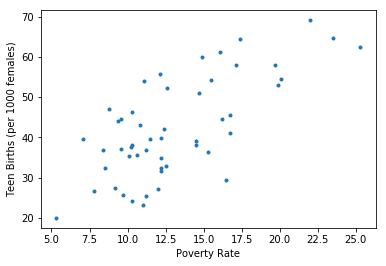

In [2]:


plt.plot(povPct, teenBrth, '.')
plt.xlabel('Poverty Rate')
plt.ylabel('Teen Births (per 1000 females)')
plt.show()

**What kind of function would you use to fit this data?**
This looks kind of linear to me.

**Define a function called birthrate to fit the data.**

In [3]:
def birthrate(x, m, b):
    return m*x + b

**c) Actually fit the data.**

**What parameters (and estimates on their ranges) do you get?**

By estimation, I see the slope near 3 and b about 1.

**Interpret the parameters.**

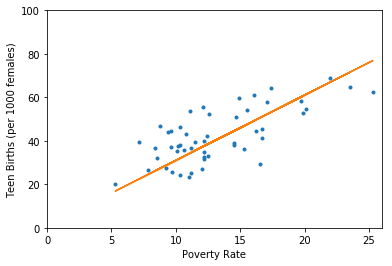

In [4]:
mBR=3
bBR= 1
plt.plot(povPct, teenBrth, '.')
plt.plot(povPct, birthrate(povPct, mBR, bBR))
plt.xlabel('Poverty Rate')
plt.ylabel('Teen Births (per 1000 females)')
plt.xlim(0, 26.0)
plt.ylim(0, 100)
plt.show()

but now, let's get the actual parameters:

In [5]:
from scipy.optimize import curve_fit

#guess starting parameters
startparamsBR = [mBR, bBR]

(parameters, cov) = curve_fit(birthrate, povPct, teenBrth, startparamsBR)
print('slope = '+str(parameters[0]))
print('offset = '+str(parameters[1]))

slope = 2.025475095009125
offset = 15.673669832135202


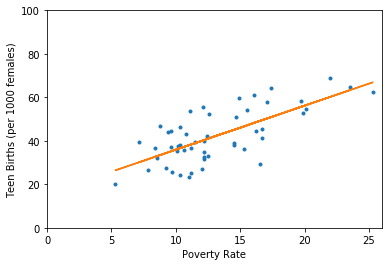

In [6]:
mBRFitted = parameters[0]
bBRFitted = parameters[1]
plt.plot(povPct, teenBrth, '.')
plt.plot(povPct, birthrate(povPct, mBRFitted, bBRFitted))
plt.xlabel('Poverty Rate')
plt.ylabel('Teen Births (per 1000 females)')
plt.xlim(0, 26.0)
plt.ylim(0, 100)
plt.show()

**My interpretation of the parameters**

The actual parameters have the slop at about 2 (m=2) and the offset at about 15.66 (b = 15 and 2/3).

This can be interpretted as follows:

-The slope being about 2 tells us that a 1 percent increase in the poverty rate translates to about a 2 percent increase in teen birth rates.
-The offset of b=15 + 2/3 tells us that at a poverty rate of 0 (no poverty!) there would be about a teen birth rate of about 15.66%

**d) The poverty rate in Puerto Rico is 45% (well, it was before Hurricane Maria). What teen birth rate do you predict with your functional fit?**

**Add this prediction to your plot.**

let's make the line longer... (extend it)

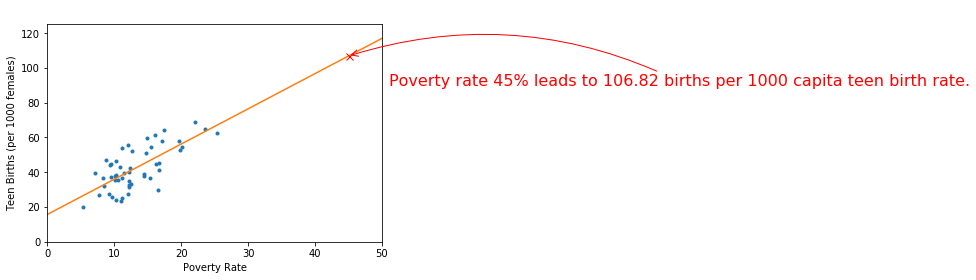

In [7]:
import math
def truncate(number, digits) -> float: #https://stackoverflow.com/questions/27779845/how-to-plot-one-single-data-point
    stepper = pow(10.0, digits)
    return math.trunc(stepper * number) / stepper
mBRFitted = parameters[0]
bBRFitted = parameters[1]
x = np.linspace(0,100,10)
y = birthrate(x, mBRFitted,bBRFitted)
plt.plot(povPct, teenBrth, '.')
plt.plot(x, y)
plt.plot(45, birthrate(45, mBRFitted,bBRFitted), marker='x', markersize=7, color="red")
plt.xlabel('Poverty Rate')
plt.ylabel('Teen Births (per 1000 females)')
plt.xlim(0, 50)
plt.ylim(0, 125)
plt.annotate(r'Poverty rate 45% leads to '+str(truncate(birthrate(45, mBRFitted,bBRFitted), 2))+' births per 1000 capita teen birth rate.',
             xy=(45, birthrate(45, mBRFitted,bBRFitted)), xycoords='data',
             xytext=(+40, -30), textcoords='offset points', fontsize=16, color='red',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='red'))

plt.show()

# 2. The Challenger Disaster.

**The logistic function is a simple transformation of a linear fit which is used to predict binary outcomes: will something happen (1) or not happen (0)?
For example, you may want to know based on someone's average milk consumption (in ounces per day), will they develop osteoperosis (a binary outcome) later in life?**

The function is defined as follows: $p(x)=(1+e^{−(mx+b)})^{−1}$, where:

x is some continuous observable

m and b are a slope and intercept, i.e. two parameters to fit.

The output, p(x), is the probability that some event occurs happens.


**Here's the actual questions you need to answer:**

**a) Make a plot of p(x) for m=10 and b=−1).**

Describe it qualitatively.
What is the range of p(x)?
Where do interesting things happen?
If we change b to 3, what changes about the plot?

In [8]:
def p(x,m,b):
    return 1/(1+np.exp(-(m*x+b)))

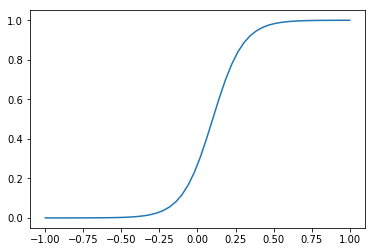

In [9]:
x = np.linspace(-1, 1)
y = p(x,10,-1)
plt.plot(x,y)
plt.show()

This looks like an exponential function but changes concavity around x=.125. The range of this function appears to be 0.0 to 1.0 (not inclusive--exclusive).

At x $\approx$ .125 there is a change in concavity (inflection point)

as x gets small (towards negative infinity) it looks like the graph has a horizonal asymptote that approaches 0.0 and as x gets big (approaches positive infinity) the graph approaches what appears to be 1.0

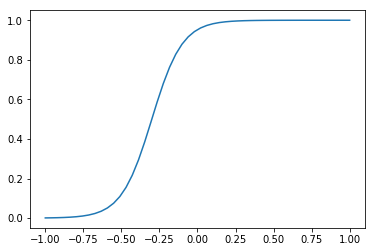

In [10]:
x = np.linspace(-1, 1)
y = p(x,10,3)
plt.plot(x,y)
plt.show()

In the graph above, we changed b from -1 to 3 and it looks like the inflection point moved to the left (change in concavity is now around -.33)

In [11]:
from astropy.table import Table, Column, MaskedColumn
from astropy.io import ascii

# Read in data and determine column names
data = ascii.read('challenger.csv', format='csv', fast_reader=False)
print(data[0])

# Convert each column to a numpy array
row  = np.array(data['Row'])
date = np.array(data['Date'])
temp = np.array(data['Temp'])
damaged = np.array(data['Damaged'])
oRings = np.array(data['O-rings'])

Row    Date   Temp Damaged O-rings
--- --------- ---- ------- -------
  1 4/12/1981   66       0       6


The two columns of interest are the Temperature the day of the launch (Temp) and the number of damaged O-rings on the booster rockets (Damaged).


You'll also need to reformat the data: we don't care how many o-rings were damaged, but whether an o-ring was damaged (1) or not (0). This is the binary outcome we're trying to predict, as a function of temperature.


Plot the rocket data. It looks thrilling, I'm sure.

In [12]:
#Redo data...:
print(damaged)
for i in np.arange(len(damaged)):
    if damaged[i] > 0:
        print(damaged[i])
        damaged[i] = 1
print(damaged)
print(temp)

[0 1 0 0 0 0 0 0 1 1 1 0 0 2 0 0 0 0 0 0 2 0 1]
1
1
1
1
2
2
1
[0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1]
[66 70 69 68 67 72 73 70 57 63 70 78 67 53 67 75 70 81 76 79 75 76 58]


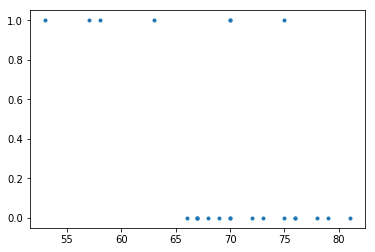

In [13]:
plt.plot(temp, damaged, '.')
plt.show()

**c) Fit the result, i.e. whether an o-ring was damaged, as a function of temperature, using the logistic model.**

Oh hey look! Curve fitting is actually hard.
Add these starting parameters (I determined them by messing around and making plots): m=−0.7, b=50

Add your curve to the previous plot.

slope = -0.3008309639716156
offset = 19.253628935543077


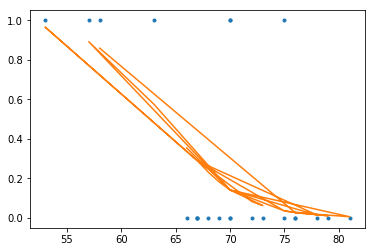

Yuck... let's expand...


In [14]:
plt.plot(temp, damaged, '.')
startparams = [-0.7, 50]
(parameters, cov) = curve_fit(p, temp, damaged, startparams)
print('slope = '+str(parameters[0]))
print('offset = '+str(parameters[1]))
plt.plot(temp, p(temp,parameters[0], parameters[1]))
plt.show()
print('Yuck... let\'s expand...')

slope = -0.3008309639716156
offset = 19.253628935543077


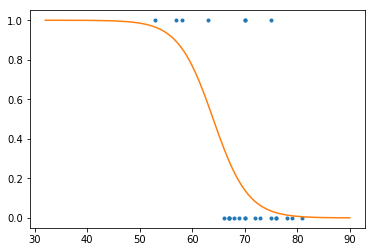

In [15]:
plt.plot(temp, damaged, '.')
startparams = [-0.7, 50]
(parameters, cov) = curve_fit(p, temp, damaged, startparams)
print('slope = '+str(parameters[0]))
print('offset = '+str(parameters[1]))
x=np.linspace(32,90,100)
plt.plot(x, p(x,parameters[0], parameters[1]))
plt.show()

In [16]:
print('If the temp=36 degrees fahrenheit, then the probability that an o-ring will fail is:')
print(str(truncate(p(36,parameters[0], parameters[1]),4)*100)+'%')

If the temp=36 degrees fahrenheit, then the probability that an o-ring will fail is:
99.97%


# 3. All of Physics

Basically everything in physics can be modeled as a damped or driven harmonic oscillator (i.e. a pendulum).

If we consider a system which has been given a kick and then left to oscillate, there exists an exact solution given by:

**$$y(t)=A(e^{−ζω_0t})sin(ω_0t\sqrt{1−ζ^2}+ϕ).$$**


In this equation:

**ω0 is the natural frequency of oscillation of the system.**

**ζ is a constant which describes the damping (i.e. friction) in the system.**

**A is the maximum amplitude of oscillation**

**ϕ is some phase.**

Note that the first two parameters are based on the intrinsic physics of the problem (the oscillation and the damping), while the last two have to do with how the system is started (how far away from the ground do I release the pendulum?).

**a) Define a function for the damped oscillator, damped.**

Make a plot of the damped function from **t = 0 to 100** for the parameters:

ω0=0.5,

ζ=0.1,

A=1, and

ϕ=0.

In [17]:
def damped(t, w, l, A, o):
    return A * (np.exp(-1*l*w*t)) * np.sin(w*t*np.sqrt(1-l*l)+o)

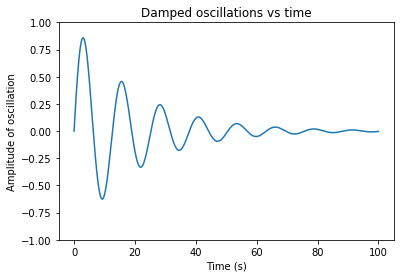

In [18]:
t = np.linspace(0, 100, 5000)
w = 0.5
l = .1
A = 1
o = 0
yDamped = damped(t, w, l, A, o)
plt.plot(t, yDamped)
plt.ylim(-1,1)
plt.title('Damped oscillations vs time')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude of oscillation')
plt.show()

**b) Also define the function envelope, given by Ae−ζω0t**


plot it on the same axes as damped, as a dashed black line

Also add to this plot −1⋅envelope.

What does the envelope function represent?

In [19]:
def envelope(t, w, l, A):
    return A * np.exp(-1*l*w*t)

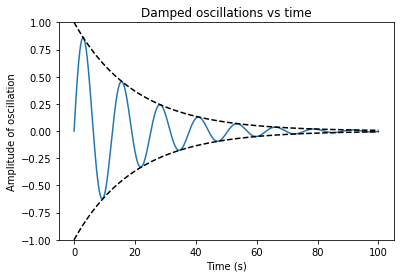

In [20]:
yEnvelope = -1* envelope(t, w, l, A)
y2Envelope = 1* envelope(t, w, l, A)
plt.plot(t, yDamped)
plt.plot(t, yEnvelope, '--', color='black')
plt.plot(t, y2Envelope, '--', color='black')
plt.title('Damped oscillations vs time')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude of oscillation')
plt.ylim(-1,1)
plt.show()

The envelop shows how far down the oscillation goes and how it is 'damped' because it dies down as **t** increases. It shows the amplitude and how the amplitude of the wave changes with time.

**c) Now, let's try to get some understanding of what the different parameters mean.**

-Change A to several different values.
What does changing A do? Be precise.


-Change ϕ to the values π/8, π/4, and π/2.
Qualitatively, what does changing ϕ do?

-Slowly increase ζ from 0.1 to 0.5.
Qualitatively, what does changing ζ do?

-This last one is a little tricky. To isolate the effect of ω0, you have to keep 1/(ζω_0) constant. So try the following combinations:

ω0=0.25, ζ=0.2

ω0=0.75, ζ=0.067

Qualitatively, what does changing ω0 do?

Chaning A:

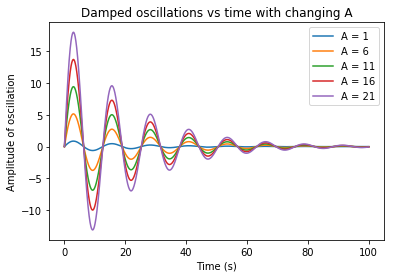

In [21]:
t = np.linspace(0, 100, 5000)
w = 0.5
l = .1
A = 1
o = 0

for i in np.arange(5):
    yDamped = damped(t, w, l, A, o)
    plt.plot(t, yDamped, label = 'A = '+str(A))
    plt.title('Damped oscillations vs time with changing A')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude of oscillation')
    A = A + 5
plt.legend()
plt.show()

As we can see, changing A affects the amplitude of the graph (How high/far the pendulum originally swings). What is the maximum point it hits?

Now let's change ϕ:

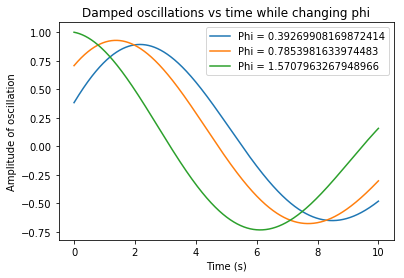

In [22]:
t = np.linspace(0, 10, 5000)
w = 0.5
l = .1
A = 1
o = np.pi/8

for i in np.arange(3):
    yDamped = damped(t, w, l, A, o)
    plt.plot(t, yDamped, label='Phi = '+str(o))
    o = o * 2    
    
plt.legend()
plt.title('Damped oscillations vs time while changing phi')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude of oscillation')
plt.show()

It appears that phi affects the offset (where they peak). Notice that the blue line follows the green and orange line because of this offset.

Changing zeta:

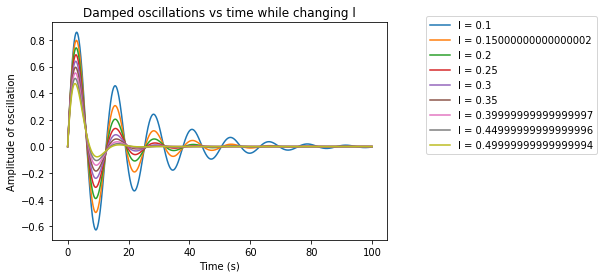

In [23]:
t = np.linspace(0, 100, 5000)
w = 0.5
l = .1
A = 1
o = 0
fig = plt.figure() # https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
ax = plt.subplot(111) #To move legend out of way
while l < .5:
    yDamped = damped(t, w, l, A, o)
    plt.plot(t, yDamped, label='l = '+str(l))
    l = l + .05  
    
plt.legend()
plt.title('Damped oscillations vs time while changing l')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude of oscillation')
ax.legend(bbox_to_anchor=(1.1, 1.05))


plt.show()

As zeta increases, the dampness increases. For example, there are more rotations (swings) when l is small, but when l is .5, there is only one swing until the pendulum motion dies. This is how much resistance there is to the swinging motion (perhaps, how much friction there is in the system).

This last one is a little tricky. To isolate the effect of $ω_0$, you have to keep $1/(ζ * ω_0)$ constant. So try the following combinations:

ω0=0.25, ζ=0.2

ω0=0.75, ζ=0.067

Qualitatively, what does changing ω0 do?

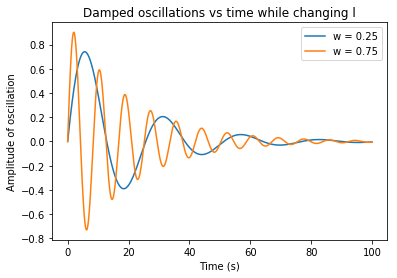

In [24]:
t = np.linspace(0, 100, 5000)
w = 0.25
l = .2
A = 1
o = 0


yDamped = damped(t, w, l, A, o)
plt.plot(t, yDamped, label='w = '+str(w))
w=.75
l=0.067
yDamped = damped(t, w, l, A, o)
plt.plot(t, yDamped, label='w = '+str(w))
    
plt.legend()
plt.title('Damped oscillations vs time while changing l')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude of oscillation')
ax.legend(bbox_to_anchor=(1.1, 1.05))


plt.show()

It appears that omega is the frequency (how many oscillations occur in a given time). Increasing the frequency increases the amount of oscillations and consequently decreases the period.

**d) Okay, let's fit some data! I've generated some data of measuring the vibration of a tuning fork when it is hit against a surface. You can download the .csv file here.**

-Find the best-fit parameters (with uncertainty) which characterize the tuning fork itself? Is this within the human range of hearing?

-I'm most interested in characterizing the actual physics of the problem, not trying to figure out how the tuning fork was hit.

-You're going to probably have to plot the data and make some starting parameter guesses, but I'll leave figuring that out to you.

Please document the work that you do in your Jupyter notebook

In [25]:
#FIRST LET'S READ IN FILE
from astropy.table import Table, Column, MaskedColumn
from astropy.io import ascii

# Read in data and determine column names
data = ascii.read('oscillation.csv', format='csv', fast_reader=False)
print(data[0])

# Convert each column to a numpy array
tFork  = np.array(data['time'])
yFork = np.array(data['y'])

time          y          
---- --------------------
 0.0 0.012244149389694231


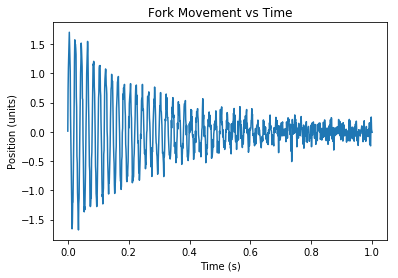

In [26]:
plt.plot(tFork, yFork)
plt.xlabel('Time (s)')
plt.ylabel('Position (units)')
plt.title('Fork Movement vs Time')
plt.show()

Guess:

Amplitude looks like about 1.6 (A = 1.6)

Offset of like pi/2 (phi = pi/2)

l, maybe, is like .1 (l = 0.1)

Looks like the frequency is really high... I count about 75 peaks so w = 75/2pi

EDIT:
So the above is wrong... the numbers used below were by testing.


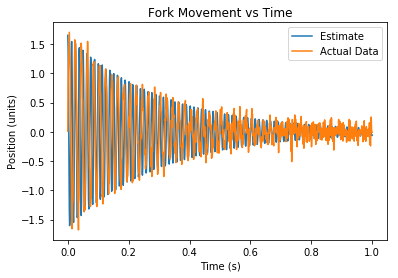

In [27]:
w = 500
l = 0.0065
o = np.pi/2
A = 1.65
tForkFake = np.linspace(0, 1.0, 1000)
yForkFake = damped(tForkFake, w, l, A, o)


plt.plot(tForkFake, yForkFake, label='Estimate')
plt.plot(tFork, yFork, label='Actual Data')
plt.xlabel('Time (s)')
plt.ylabel('Position (units)')
plt.title('Fork Movement vs Time')
plt.legend()
plt.show()

Now let's fit!

In [28]:
startparams = [w, l, A, o]
(parameters, cov) = curve_fit(damped, tFork, yFork, startparams)

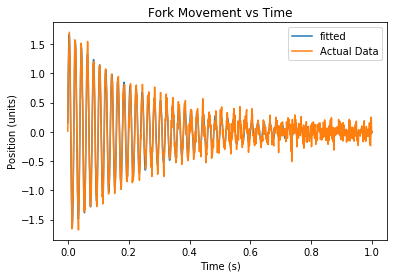

In [29]:
wFitted = parameters[0]
lFitted = parameters[1]
AFitted = parameters[2]
oFitted = parameters[3]

plt.plot(tForkFake, damped(tForkFake, wFitted, lFitted, AFitted, oFitted), label='fitted')
plt.plot(tFork, yFork, label='Actual Data')
plt.xlabel('Time (s)')
plt.ylabel('Position (units)')
plt.title('Fork Movement vs Time')
plt.legend()
plt.show()

In [34]:
# Calculating uncertainties
# We get parameters and covariance arguments back when we fit
#

In [35]:
#the variable c will hold all of the uncertainties. Uncertainty is calculated by taking the square root of the covariance.
c = np.sqrt(cov)
print(c)

[[0.05721544 0.00035338        nan        nan]
 [0.00035338 0.00018248        nan        nan]
 [       nan        nan 0.01833949 0.00217302]
 [       nan        nan 0.00217302 0.01070994]]


/home/idies/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


In [32]:
uncertaintyW = c[0][0]
uncertaintyL = c[1][1]
uncertaintyA = c[2][2]
uncertaintyO = c[3][3]

print('Omega is '+str(truncate(parameters[0], 4))+' plus/minus '+str(truncate(uncertaintyW,4)))
print('Zeta is '+str(truncate(parameters[1], 5))+' plus/minus '+str(truncate(uncertaintyL, 5)))
print('A is '+str(truncate(parameters[2], 4))+' plus/minus '+str(truncate(uncertaintyA, 4)))
print('Phi is '+str(truncate(parameters[3], 4))+' plus/minus '+str(truncate(uncertaintyO, 4)))

Omega is 314.1065 plus/minus 0.0572
Zeta is 0.01187 plus/minus 0.00018
A is -1.7058 plus/minus 0.0183
Phi is 3.2322 plus/minus 0.0107
